In [1]:
def dijkstra(matrix, start):
    n = len(matrix)  # Matrisin boyutunu n olarak belirle
    distances = [float('infinity')] * n  # Tüm düğümler için mesafeleri sonsuz olarak başlat
    distances[start] = 0  # Başlangıç düğümünün mesafesini 0 olarak ayarla
    visited = [False] * n  # Tüm düğümler için ziyaret durumunu False olarak başlat
    previous_nodes = [None] * n  # Tüm düğümler için önceki düğümleri None olarak başlat
    
    for _ in range(n):  # n kere döngüye gir
        min_distance = float('infinity')  # Minimum mesafeyi başta sonsuz olarak ayarla
        current_node = None  # Şu anki düğümü başta None olarak ayarla
        for node in range(n):  # Tüm düğümleri kontrol et
            if not visited[node] and distances[node] < min_distance:  # Eğer düğüm ziyaret edilmemişse ve mesafesi minimumdan küçükse
                min_distance = distances[node]  # Minimum mesafeyi güncelle
                current_node = node  # Şu anki düğümü güncelle
                
        if current_node is None:  # Eğer şu anki düğüm None ise, döngüyü kır
            break
        
        visited[current_node] = True  # Şu anki düğümü ziyaret edilmiş olarak işaretle
        
        for neighbor in range(n):  # Tüm komşuları kontrol et
            if matrix[current_node][neighbor] != 0 and not visited[neighbor]:  # Eğer komşu bağlantısı varsa ve ziyaret edilmemişse
                distance = distances[current_node] + matrix[current_node][neighbor]  # Yeni mesafeyi hesapla
                if distance < distances[neighbor]:  # Eğer yeni mesafe önceki mesafeden küçükse
                    distances[neighbor] = distance  # Mesafeyi güncelle
                    previous_nodes[neighbor] = current_node  # Önceki düğümü güncelle
    
    return distances, previous_nodes  # Mesafeleri ve önceki düğümleri geri döndür

# Graf matrisi
graph_matrix = [
    [0, 4, 2, 0, 0, 0], 
    [0, 0, 5, 10, 0, 0], 
    [0, 0, 0, 3, 4, 0], 
    [0, 0, 0, 0, 0, 11], 
    [0, 0, 0, 1, 0, 5], 
    [0, 0, 0, 0, 0, 0],
]

# Başlangıç düğümü
start_node = 0
# Bitiş düğümü
end_node = 5

# Dijkstra algoritmasını çalıştır
distances, previous_nodes = dijkstra(graph_matrix, start_node)

# Mesafeleri yazdır
print("Distances:", distances)
# Önceki düğümleri yazdır
print("Previous nodes:", previous_nodes)


Distances: [0, 4, 2, 5, 6, 11]
Previous nodes: [None, 0, 0, 2, 2, 4]


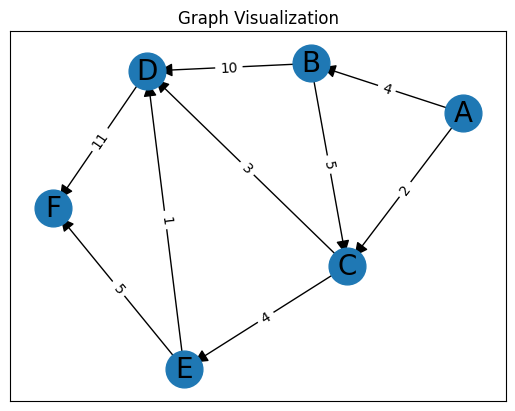

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

graph_matrix = [
    [0, 4, 2, 0, 0, 0], 
    [0, 0, 5, 10, 0, 0], 
    [0, 0, 0, 3, 4, 0], 
    [0, 0, 0, 0, 0, 11], 
    [0, 0, 0, 1, 0, 5], 
    [0, 0, 0, 0, 0, 0],
]

node_labels = ['A', 'B', 'C', 'D', 'E', 'F']

def draw_graph(matrix, labels):
    G = nx.DiGraph()
    n = len(matrix)
    
    for i in range(n):
        for j in range(n):
            if matrix[i][j] != 0:
                G.add_edge(labels[i], labels[j], weight=matrix[i][j])
    
    pos = nx.spring_layout(G)  # positions for all nodes
    
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)
    
    # edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowstyle='-|>', arrowsize=20)
    
    # labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title("Graph Visualization")
    plt.show()

draw_graph(graph_matrix, node_labels)
